# 01_eda.ipynb
## Project - Spotify 2023
# Goal: First look at the dataset (ingestion + quick overview)

### Load dataset

In [1]:
%pip install pandas
import pandas as pd
df = pd.read_csv("../data/raw/spotify-2023.csv", encoding="latin1")

df.shape
df.info()
df.describe()


Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   95

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Missing values, duplicates and dtypes overview

In [2]:
missing = df.isnull().sum().sort_values(ascending=False)
duplicates = df.duplicated().sum()
dtypes = df.dtypes

missing.head(20), duplicates, dtypes

(key                     95
 in_shazam_charts        50
 track_name               0
 artist(s)_name           0
 released_month           0
 released_day             0
 artist_count             0
 released_year            0
 in_spotify_charts        0
 in_spotify_playlists     0
 streams                  0
 in_apple_playlists       0
 in_deezer_playlists      0
 in_apple_charts          0
 in_deezer_charts         0
 bpm                      0
 mode                     0
 danceability_%           0
 valence_%                0
 energy_%                 0
 dtype: int64,
 np.int64(0),
 track_name              object
 artist(s)_name          object
 artist_count             int64
 released_year            int64
 released_month           int64
 released_day             int64
 in_spotify_playlists     int64
 in_spotify_charts        int64
 streams                 object
 in_apple_playlists       int64
 in_apple_charts          int64
 in_deezer_playlists     object
 in_deezer_charts         i

### Convert numeric columns stored as object

In [3]:
for col in ["streams", "in_deezer_playlists", "in_shazam_charts"]:
    bad_values = df[~df[col].astype(str).str.replace(",", "", regex=False).str.isnumeric()][col].unique()
    print(f"{col} → {bad_values[:20]}")


streams → ['BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
in_deezer_playlists → []
in_shazam_charts → [nan]


#### Remove non-numeric rows from 'streams'

In [4]:
df = df[df["streams"].str.replace(",", "", regex=False).str.isnumeric()]

#### Convert columns to numeric

In [5]:
df["streams"] = df["streams"].str.replace(",", "", regex=False).astype(float)
df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"], errors="coerce").fillna(0)
df["in_shazam_charts"] = pd.to_numeric(df["in_shazam_charts"], errors="coerce").fillna(0)

In [6]:
df[["streams", "in_deezer_playlists", "in_shazam_charts"]].dtypes

streams                float64
in_deezer_playlists    float64
in_shazam_charts       float64
dtype: object

#### Numeric summary of key columns
We check the distribution of numeric variables (mean, std, min, max, quartiles) to detect anomalies and potential outliers.


In [7]:
num_cols = [
    "streams", "bpm", "danceability_%", "valence_%", "energy_%",
    "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%",
    "in_spotify_playlists", "in_spotify_charts",
    "in_apple_playlists", "in_apple_charts",
    "in_deezer_playlists", "in_deezer_charts",
    "in_shazam_charts"
]

summary = df[num_cols].describe().T
summary[["mean","std","min","25%","50%","75%","max"]]


,mean,std,min,25%,50%,75%,max
streams,5.141374e+08,5.668569e+08,2762.0,1.416362e+08,290530915.0,6.738690e+08,3.703895e+09
bpm,1.225536e+02,2.806960e+01,65.0,9.975000e+01,121.0,1.402500e+02,2.060000e+02
danceability_%,6.698424e+01,1.463128e+01,23.0,5.700000e+01,69.0,7.800000e+01,9.600000e+01
valence_%,5.140651e+01,2.348053e+01,4.0,3.200000e+01,51.0,7.000000e+01,9.700000e+01
energy_%,6.427416e+01,1.655852e+01,9.0,5.300000e+01,66.0,7.700000e+01,9.700000e+01
acousticness_%,2.707878e+01,2.600160e+01,0.0,6.000000e+00,18.0,4.300000e+01,9.700000e+01
instrumentalness_%,1.582983e+00,8.414064e+00,0.0,0.000000e+00,0.0,0.000000e+00,9.100000e+01
liveness_%,1.821429e+01,1.371837e+01,3.0,1.000000e+01,12.0,2.400000e+01,9.700000e+01
speechiness_%,1.013866e+01,9.915399e+00,2.0,4.000000e+00,6.0,1.100000e+01,6.400000e+01
in_spotify_playlists,5.202565e+03,7.901401e+03,31.0,8.745000e+02,2216.5,5.573750e+03,5.289800e+04


#### Log-transform streams
Since `streams` is highly skewed (min: 2.7k, max: 3.7B), we apply log1p transformation
to stabilize the variance and make visualizations and models more interpretable.


In [8]:
import numpy as np

df["log_streams"] = np.log1p(df["streams"])
df[["streams", "log_streams"]].describe()


,streams,log_streams
count,9.520000e+02,952.000000
mean,5.141374e+08,19.506648
std,5.668569e+08,1.146289
min,2.762000e+03,7.924072
25%,1.416362e+08,18.768772
50%,2.905309e+08,19.487220
75%,6.738690e+08,20.328546
max,3.703895e+09,22.032651


#### Univariate distributions
We plot histograms for:
- log_streams (transformed target)
- bpm
- danceability_%, valence_%, energy_%
- acousticness_%, instrumentalness_%, liveness_%, speechiness_%

This helps us understand distributions and potential outliers.


In [9]:
import sys, subprocess

print("Kernel Python:", sys.executable)
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "seaborn"])
import seaborn as sns
import matplotlib.pyplot as plt


Kernel Python: c:\Users\pc\Desktop\PROJECTS\venv\Scripts\python.exe


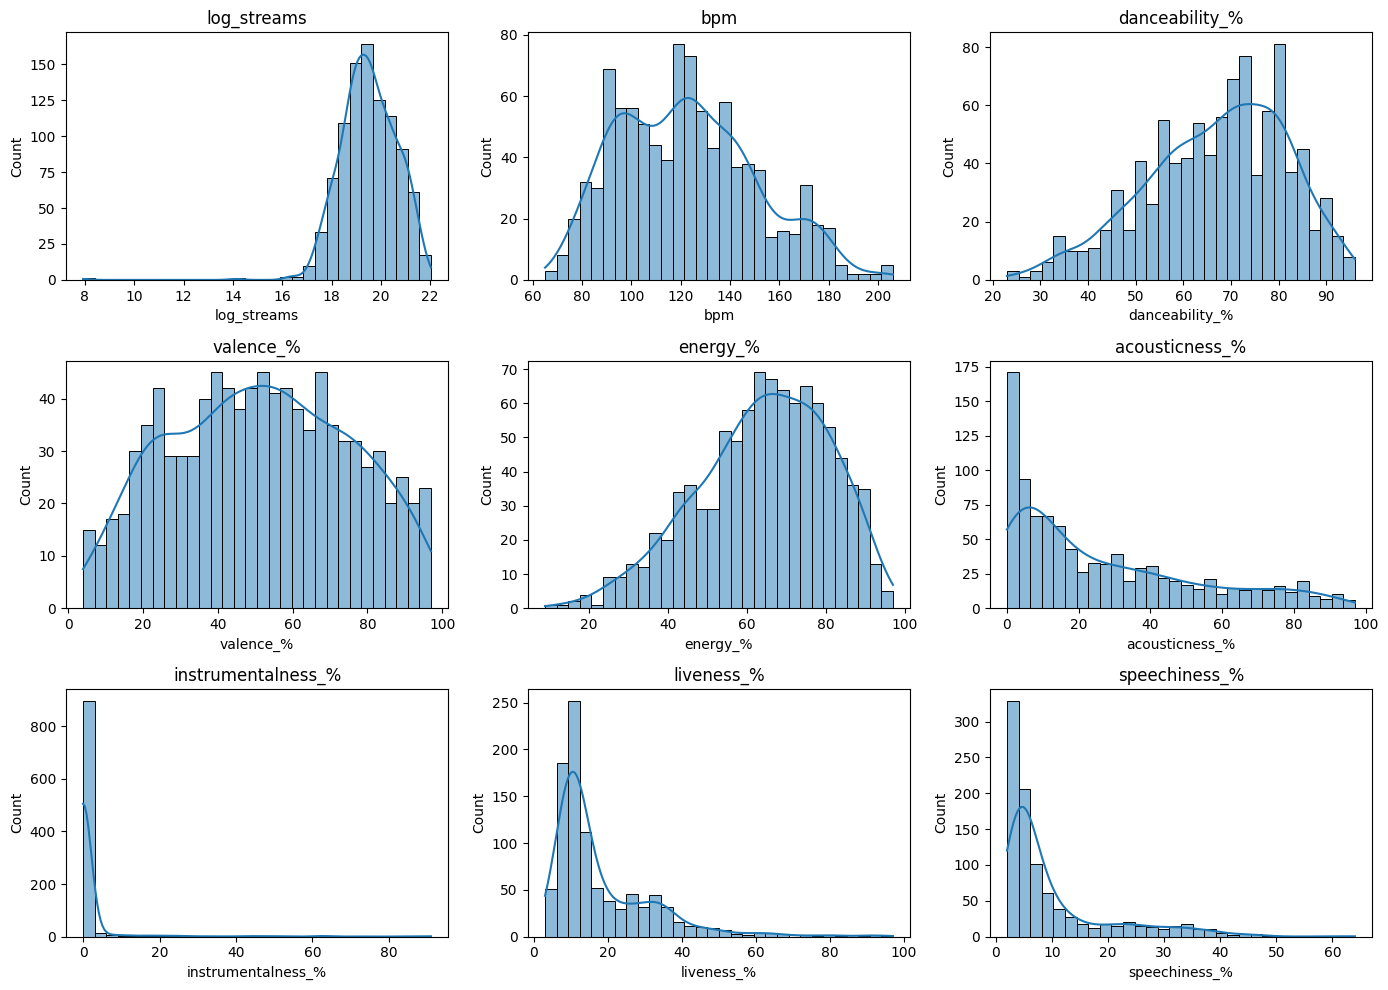

In [10]:


cols_to_plot = [
    "log_streams", "bpm", "danceability_%", "valence_%", "energy_%",
    "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"
]

plt.figure(figsize=(14, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()
